In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 28 Lecture 2 Assignment

In this assignment, we will learn about overfitting and regularization. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [2]:
import warnings

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
king_county = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv"
)

<IPython.core.display.Javascript object>

In [4]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<IPython.core.display.Javascript object>

Perform the same transformations in the previous assignment to meet model assumptions:
1. Remove all columns except: price, bedrooms, bathrooms, sqft_living, floors, waterfront
1. Remove outliers
1. Split the data into train and test subsets. 20% of the data should be in the test subset

In [5]:
# answer below:
df = king_county[
    ["price", "bedrooms", "bathrooms", "sqft_living", "floors", "waterfront"]
]  # answer below:
# answer below:
df = df[df["bedrooms"] < 30]
df = df.drop(12777)

<IPython.core.display.Javascript object>

In [6]:
# answer below:
X = df.drop(columns="price")
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

Apply a ridge regression model with lambda=50 to the data and evaluate by looking at r squared for test and train

In [7]:
# answer below:
ridge = Ridge(alpha=50)
ridge.fit(X_train, y_train)


Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

<IPython.core.display.Javascript object>

In [8]:
ridge.score(X_train, y_train)

0.5375108729226652

<IPython.core.display.Javascript object>

In [9]:
ridge.score(X_test, y_test)

0.5470540168189424

<IPython.core.display.Javascript object>

Perform a grid search for the following values of alpha: 0.001, 0.01, 0.1, 1, 10, 100, 1000 to find the most optimal ridge regression model. Experiment with different scoring metrics in the grid search (R^2 is the default, but you can use root mean squared error or many others). 
https://scikit-learn.org/stable/modules/model_evaluation.html

In [33]:
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

<IPython.core.display.Javascript object>

In [28]:
#answer below:

scorer = make_scorer(mean_squared_error)
grid = {"alpha": [ 0.001, 0.01, 0.1, 1, 10 ,100, 1000]}
ridge_cv = GridSearchCV(Ridge(), grid, verbose=1, scoring=scorer)
ridge_cv.fit(X_train, y_train)

print(f"selected alpha: {ridge_cv.best_estimator_.alpha}")
# print(f"selected l1_ratio: {ridge_cv.best_estimator_.l1_ratio}")
ridge_cv.best_estimator_.coef_


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished


selected alpha: 1000


array([-54902.39367406,   7545.68727775,    304.82240417,   2005.20370049,
        87183.92558347])

<IPython.core.display.Javascript object>

In [29]:
ridge_cv.score(X_train, y_train)

63581746074.9673

<IPython.core.display.Javascript object>

In [30]:
ridge_cv.score(X_test, y_test)

71791721373.46822

<IPython.core.display.Javascript object>

In [ ]:
y_pred = ridge_cv.predict(X_test)

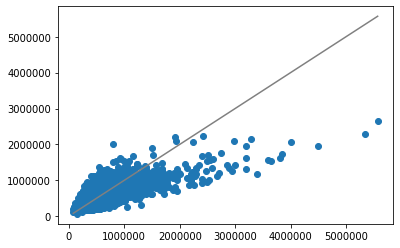

<IPython.core.display.Javascript object>

In [31]:
y_pred = ridge_cv.predict(X_test)
mn = y_test.min()
mx = y_test.max()

plt.scatter(y_test, y_pred)
plt.plot([mn, mx], [mn, mx], c="gray")

In [34]:
r2_score(y_test, y_pred)

0.5214235203866222

<IPython.core.display.Javascript object>

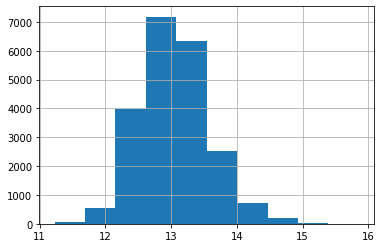

<IPython.core.display.Javascript object>

In [21]:
np.log(y).hist()